In [16]:
print("test")

test


In [17]:
import pickle

In [4]:
with open('Pickled data/df-cleaned-final.pickle', 'rb') as f:
    df = pickle.load(f)

In [18]:
df.head()

,Score,Tweet,TweetStripped
0,0.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww, that' bummer. shoulda got david carr t..."
1,0.0,is upset that he can't update his Facebook by ...,upset can't updat facebook text it... might cr...
2,0.0,@Kenichan I dived many times for the ball. Man...,dive mani time ball. manag save 50% rest go bound
3,0.0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0.0,"@nationwideclass no, it's not behaving at all....","no, behav all. i'm mad. here? can't see there."


In [19]:
from nltk.corpus import stopwords # nltk.download('stopwords') before importing
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def clean(tweet):
    stage1 = [word for word in tweet.lower().split() if word not in stopwords.words('english')] # stopword removal
    stage2 = [word[1:] if word.startswith('#') else word for word in stage1] # Hashtag symbol removal
    stage3 = [stemmer.stem(word) for word in stage2 if not any([word.startswith('@'), word.startswith('http'), word.startswith('www')])] # @ mentions and websites removal and stemming
    return ' '.join(stage3)

In [34]:
with open('Pickled data/LR.pickle', 'rb') as f:
    model_LR = pickle.load(f)
    
with open('Pickled data/naive-bayes.pickle', 'rb') as f2:
    model_NB = pickle.load(f2)
    
with open('Pickled data/vector.pickle', 'rb') as f3:
    vector = pickle.load(f3)

with open('Pickled data/nn.pickle', 'rb') as f3: #get rid of for tariks cpu
    model_nn = pickle.load(f3)




In [21]:
def predict(tweet, model):
    score = model.predict(vector.transform([tweet]))
    return score[0]

In [22]:
from sklearn.model_selection import train_test_split # Used to split the data into training and testing

train, test = train_test_split(df, test_size = 0.1, shuffle = True)


In [23]:
test.head()

,Score,Tweet,TweetStripped
965892,1.0,@Coriantura Heh. I think AC Clarke might've la...,heh. think ac clark might'v label dark energi ...
1017779,1.0,"will go now, because her head hurts. :| hopefu...","go now, head hurts. :| hopefully, updat tomorr..."
794939,0.0,Google Chrome is so effing fast! Especially on...,googl chrome ef fast! especi quad core machine...
1301656,1.0,that was my last pill!! *dance*,last pill!! *dance*
1486924,1.0,gonna watch hannah montana the new episode on ...,gonna watch hannah montana new episod youtub e...


In [24]:
test = test.drop('TweetStripped', axis=1)

In [25]:
%%time
test['LR_score'] = test['Tweet'].apply(lambda x:  predict(x,model = model_LR))

Wall time: 7min 6s


In [26]:
%%time
test['NB_score'] = test['Tweet'].apply(lambda x:  predict(x,model = model_NB))

Wall time: 7min 40s


In [ ]:
%%time
test['NB_score'] = test['Tweet'].apply(lambda x:  predict(x,model = model_NB))

In [27]:
test.head()

,Score,Tweet,LR_score,NB_score
965892,1.0,@Coriantura Heh. I think AC Clarke might've la...,1.0,0.0
1017779,1.0,"will go now, because her head hurts. :| hopefu...",0.0,1.0
794939,0.0,Google Chrome is so effing fast! Especially on...,0.0,1.0
1301656,1.0,that was my last pill!! *dance*,1.0,0.0
1486924,1.0,gonna watch hannah montana the new episode on ...,1.0,1.0


In [37]:
#test.to_pickle("df.pickle")

In [38]:
#with open('df2.pickle', 'rb') as f:
    #test = pickle.load(f)

In [41]:
import numpy as np
test['LR_correct'] = np.where(test['Score'] == test['LR_score'],1,0)
test['NB_correct'] = np.where(test['Score'] == test['NB_score'],1,0)
test['NN_correct'] = np.where(test['Score'] == test['NN_score'],1,0)
lr_correct = test['LR_correct'].sum()
nb_correct = test['NB_correct'].sum()
nn_correct = test['NN_correct'].sum()
rows = test.shape[0]
print(test.head())
print(rows)
print(lr_correct)
print(nb_correct)
print(nn_correct)


Score                                              Tweet  LR_score  \
965892     1.0  @Coriantura Heh. I think AC Clarke might've la...       1.0   
1017779    1.0  will go now, because her head hurts. :| hopefu...       0.0   
794939     0.0  Google Chrome is so effing fast! Especially on...       0.0   
1301656    1.0                   that was my last pill!! *dance*        1.0   
1486924    1.0  gonna watch hannah montana the new episode on ...       1.0   

         NB_score  LR_correct  NB_correct  NN_score  NN_correct  
965892        0.0           1           0       1.0           1  
1017779       1.0           0           1       0.0           0  
794939        1.0           1           0       0.0           1  
1301656       0.0           1           0       0.0           0  
1486924       1.0           1           1       1.0           1  
160000
120436
91401
91213


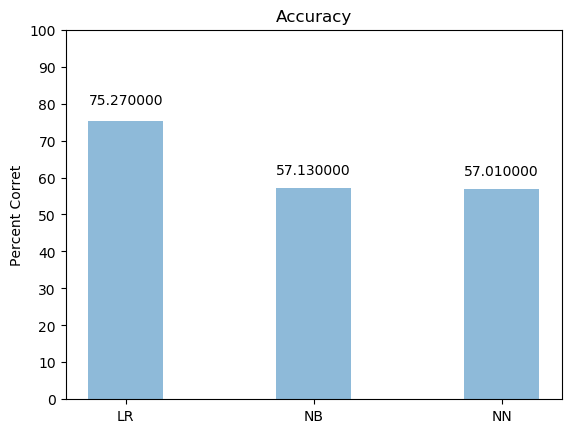

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy, pylab

objects = ('LR',"NB","NN")
y_pos = np.arange(len(objects))
performance = [round(lr_correct/rows * 100,2),round(nb_correct/rows * 100,2),round(nn_correct/rows * 100,2)]
fig, ax = plt.subplots()
rects1 = ax.bar(y_pos, performance, align='center', alpha=0.5, width = .4)
plt.xticks(y_pos, objects)
plt.ylabel('Percent Corret')
plt.title('Accuracy')
plt.yticks(np.arange(0, 110, 10))
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)
plt.show()